In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# loading the data 
sales_data = pd.read_csv('/content/drive/MyDrive/Train (1).csv')
#checking the first 5 rows of the dataframe
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sales_data.shape

(8523, 12)

In [5]:
# getting some information about the dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
sales_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
sales_data['Item_Weight'].mean()

12.857645184135976

In [8]:
sales_data['Item_Weight'].fillna(sales_data['Item_Weight'].mean(), inplace=True)

In [9]:
sales_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
mode_of_Outlet_size = sales_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [11]:
miss_values = sales_data['Outlet_Size'].isnull()

In [12]:
sales_data.loc[miss_values, 'Outlet_Size'] = sales_data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [13]:
sales_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [14]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
sales_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [16]:
encoder = LabelEncoder()

In [17]:
sales_data['Item_Identifier'] = encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content'] = encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type'] = encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier'] = encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size'] = encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type'] = encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type'] = encoder.fit_transform(sales_data['Outlet_Type'])

In [18]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [19]:
#Let's have all the features in X & target in Y
X = sales_data.drop(columns='Item_Outlet_Sales', axis=1)
y = sales_data['Item_Outlet_Sales']

In [20]:
X.shape

(8523, 11)

In [21]:
y.shape

(8523,)

In [22]:
x_train = X.iloc[0:6822] # 80%
x_test = X.iloc[6822:] # 20%
y_train = y.iloc[0:6822] # 80%
y_test = y.iloc[6822:] # 20%
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [23]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6822, 11)
(1701, 11)
(6822,)
(1701,)


In [24]:
x_train.head(100)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300000,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920000,2,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500000,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200000,2,0.000000,6,182.0950,0,1998,2,2,0
4,1297,8.930000,1,0.000000,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
95,970,12.857645,1,0.009715,5,120.0414,4,1985,2,0,0
96,382,12.150000,1,0.131384,5,246.0460,9,1999,1,0,1
97,231,8.750000,2,0.074613,6,187.4556,6,2004,2,1,1
98,1442,12.857645,1,0.028460,9,149.9708,5,1985,1,2,3


In [25]:
import numpy as np

x_train = np.asarray(x_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [26]:
mea = np.mean(x_train,axis = 0)
std = np.std(x_train,axis = 0)
x_train = (x_train-mea)/std
x_test = (x_test-mea)/std

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize the input data
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

# Add noise to the validation data
noise_factor = 0.7
x_test_noisy = x_test_norm + np.random.normal(loc=0, scale=noise_factor, size=x_test_norm.shape)

# Define the input shape
input_shape = (x_train_norm.shape[1], 1)

# Create the model
model = Sequential()

# Add the first SimpleRNN layer
model.add(SimpleRNN(units=64, return_sequences=True, input_shape=input_shape))
model.add(Dropout(0.2))

# Add the second SimpleRNN layer
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(Dropout(0.2))

# Add the third SimpleRNN layer
model.add(SimpleRNN(units=16))
model.add(Dropout(0.2))

# Add the output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
              metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

# Train the model
history = model.fit(x_train_norm, y_train,
                    validation_data=(x_test_noisy, y_test),
                    epochs=100,
                    batch_size=128,
                    verbose=1,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', mode='min', patience=10)])


Epoch 1/100
54/54 [==============================] - 4s 31ms/step - loss: 7649736.5000 - root_mean_squared_error: 2765.8157 - mean_absolute_error: 2180.9316 - val_loss: 7631276.0000 - val_root_mean_squared_error: 2762.4763 - val_mean_absolute_error: 2155.5371
Epoch 2/100
54/54 [==============================] - 1s 28ms/step - loss: 7635453.5000 - root_mean_squared_error: 2763.2324 - mean_absolute_error: 2177.6123 - val_loss: 7619625.5000 - val_root_mean_squared_error: 2760.3669 - val_mean_absolute_error: 2152.8313
Epoch 3/100
54/54 [==============================] - 1s 27ms/step - loss: 7622588.0000 - root_mean_squared_error: 2760.9036 - mean_absolute_error: 2174.6638 - val_loss: 7608572.0000 - val_root_mean_squared_error: 2758.3640 - val_mean_absolute_error: 2150.2756
Epoch 4/100
54/54 [==============================] - 1s 22ms/step - loss: 7610426.0000 - root_mean_squared_error: 2758.7000 - mean_absolute_error: 2171.8596 - val_loss: 7597899.0000 - val_root_mean_squared_error: 2756.42

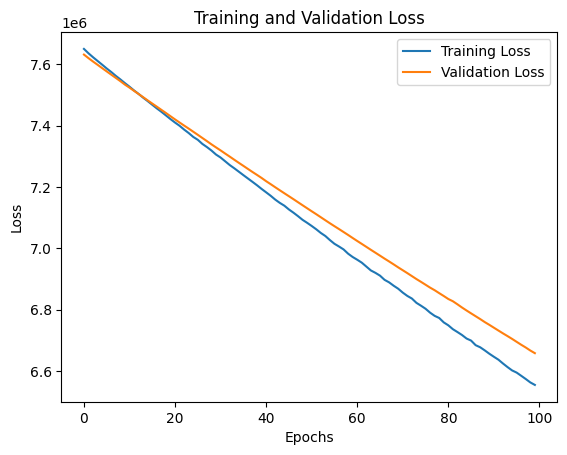

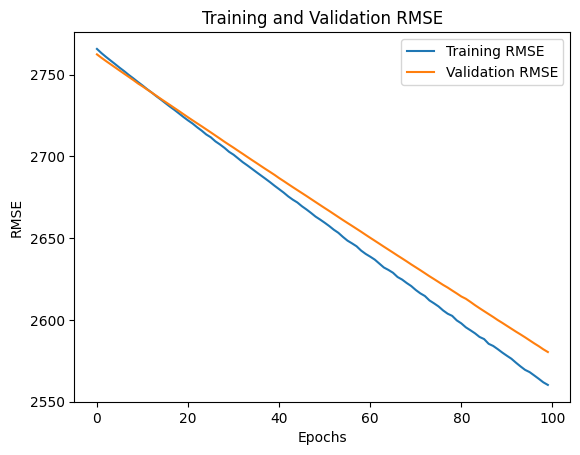

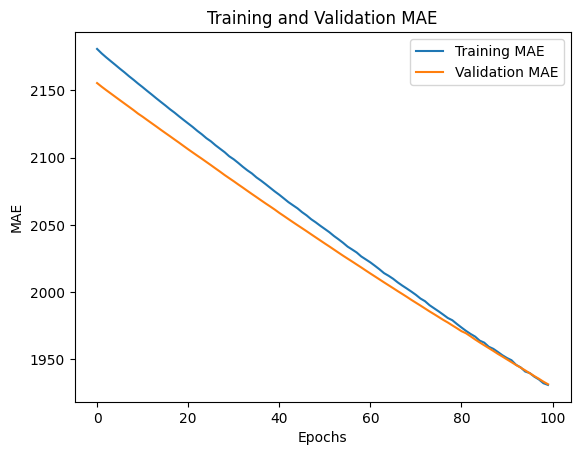

In [42]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation RMSE
plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Plot the training and validation MAE
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()
